/var/folders/dy/ypdslq3j27b8qsqchnzr7dhr0000gn/T/ipykernel_96795/1135277757.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,
/var/folders/dy/ypdslq3j27b8qsqchnzr7dhr0000gn/T/ipykernel_96795/1135277757.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_freq = df.groupby(['Category', 'Price_Bin']).size().unstack()
/var/folders/dy/ypdslq3j27b8qsqchnzr7dhr0000gn/T/ipykernel_96795/1135277757.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,


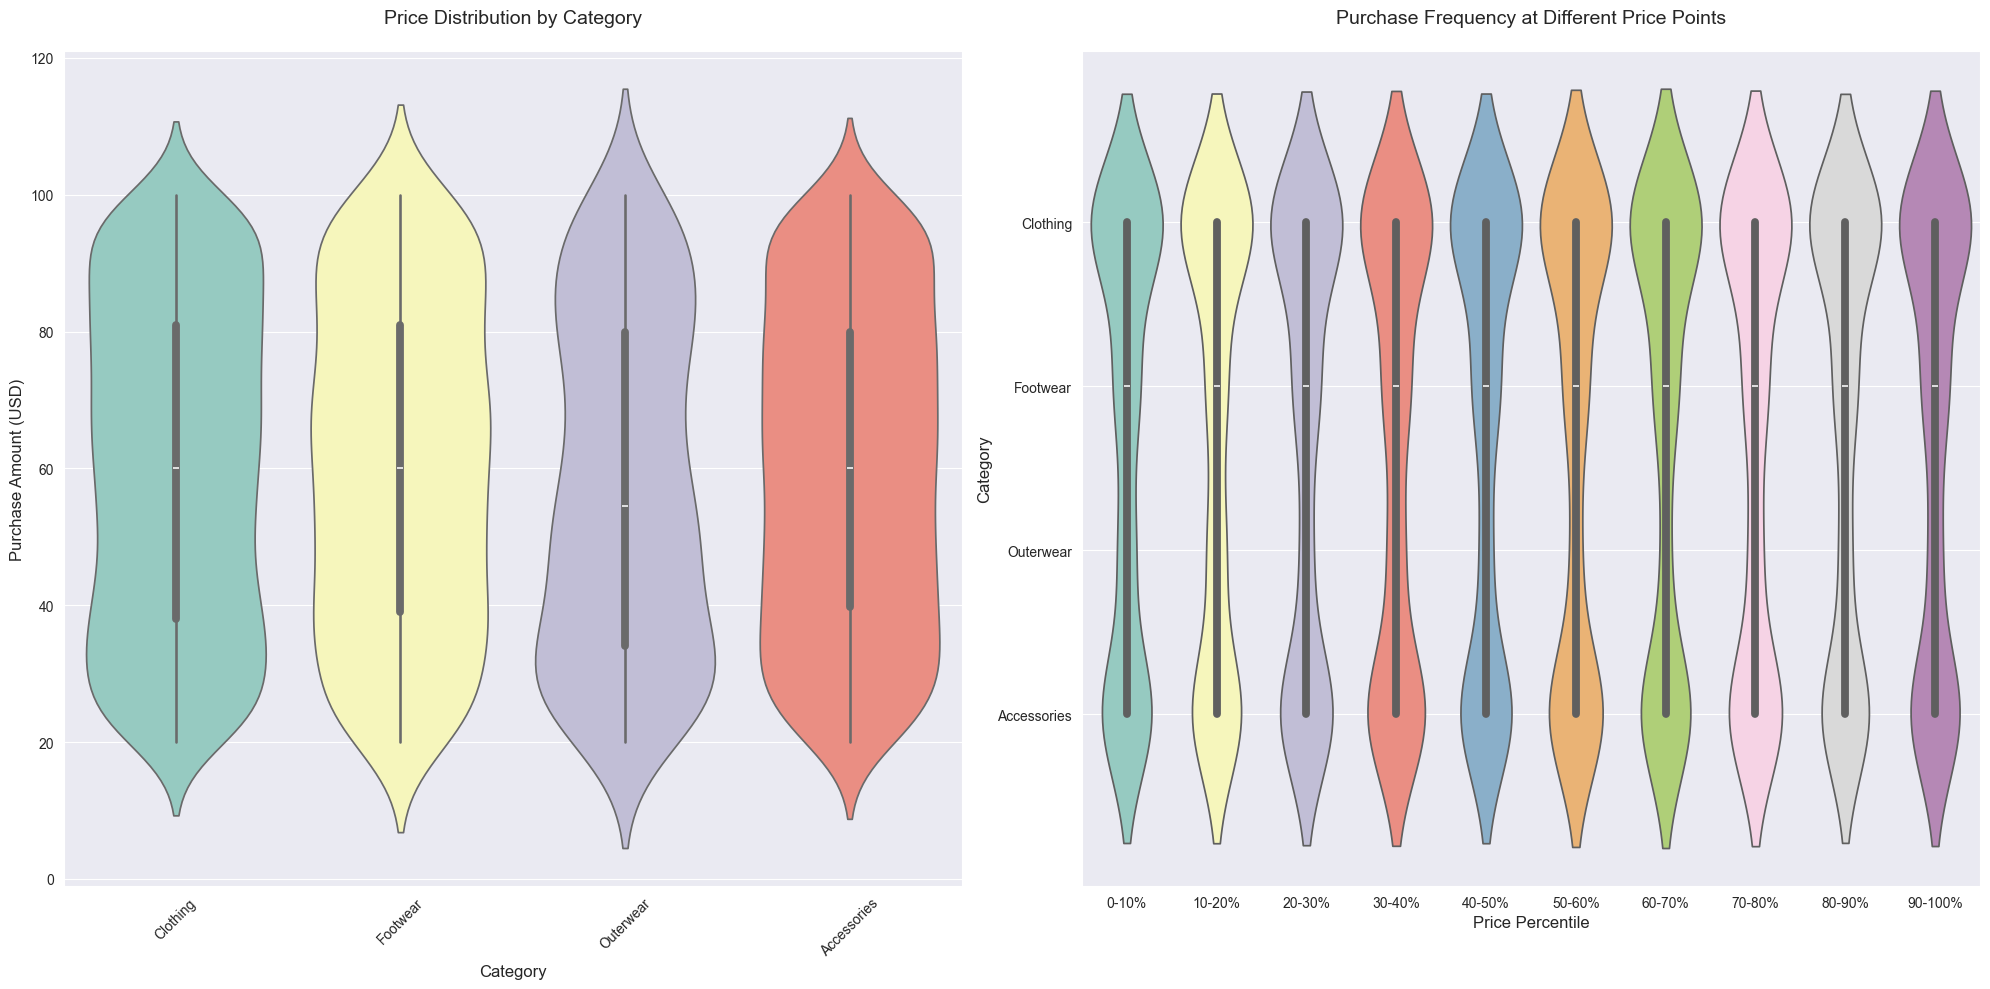


Price Statistics by Category:
              count       mean        std   min    25%   50%   75%    max
Category                                                                 
Accessories  1240.0  59.838710  23.301230  20.0  39.75  60.0  80.0  100.0
Clothing     1737.0  60.025331  23.792460  20.0  38.00  60.0  81.0  100.0
Footwear      599.0  60.255426  23.638439  20.0  39.00  60.0  81.0  100.0
Outerwear     324.0  57.172840  24.590033  20.0  34.00  54.5  80.0  100.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('shopping_behavior_updated.csv')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Price distribution by category
sns.violinplot(data=df, 
               x='Category', 
               y='Purchase Amount (USD)',
               ax=ax1,
               palette='Set3')

ax1.set_title('Price Distribution by Category', fontsize=14, pad=20)
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Purchase Amount (USD)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Purchase frequency at different price points
# Create price bins
df['Price_Bin'] = pd.qcut(df['Purchase Amount (USD)'], q=10, labels=['0-10%', '10-20%', '20-30%', '30-40%', 
                                                                     '40-50%', '50-60%', '60-70%', '70-80%',
                                                                     '80-90%', '90-100%'])

purchase_freq = df.groupby(['Category', 'Price_Bin']).size().unstack()

sns.violinplot(data=df, 
               x='Price_Bin', 
               y='Category',
               ax=ax2,
               palette='Set3')

ax2.set_title('Purchase Frequency at Different Price Points', fontsize=14, pad=20)
ax2.set_xlabel('Price Percentile', fontsize=12)
ax2.set_ylabel('Category', fontsize=12)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nPrice Statistics by Category:")
print(df.groupby('Category')['Purchase Amount (USD)'].describe())